## 🏡 House Price Prediction - Exploratory Data Analysis

This project focuses on analyzing and understanding the key factors that influence house prices using a dataset containing various property features. The main objective is to explore the data, identify patterns, and draw insights that could potentially be used in price prediction models.

This project is purely exploratory in nature, focusing on understanding the dataset rather than applying machine learning.

### 🧠 Problem Statement

The aim of this project is to explore the features in the housing dataset and understand how they relate to the target variable - `SalePrice`. This analysis can help us:
- Identify the most influential features
- Detect missing or skewed data
- Clean and prepare data for future modeling tasks

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing(as_frame = True)
print(housing)

{'data':        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -1

### 📊 Dataset Overview

The dataset contains housing-related features including:
- Property physical characteristics (e.g., LotArea, OverallQual)
- Temporal data (YearBuilt, YrSold)
- Categorical features (Neighborhood, HouseStyle)
- The target variable: `SalePrice`

We will perform data cleaning, handle missing values, conduct visualizations, and investigate feature correlations.

In [5]:
housing['data'].head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [7]:
housing['target'].head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

### 🔍 Step 1: Load and Inspect the Data

We begin by loading the data into a pandas DataFrame and inspecting its shape, column names, and types. This helps set the foundation for further cleaning and analysis.

### 🧼 Step 2: Data Cleaning

We check for missing values and decide whether to fill or drop them based on the proportion of missingness. Proper handling of null values is essential for ensuring valid conclusions.

In [9]:
df = pd.DataFrame(housing['data'])
df['Price'] = housing['target']
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [13]:
df.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
Price,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


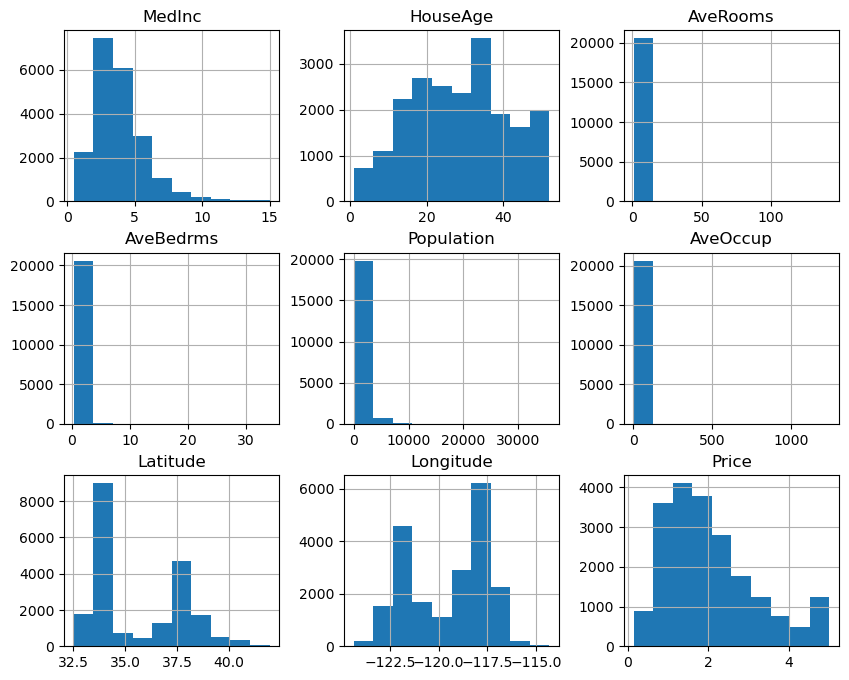

In [17]:
df.hist(figsize=(10,8))
plt.show()

In [19]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


<Axes: >

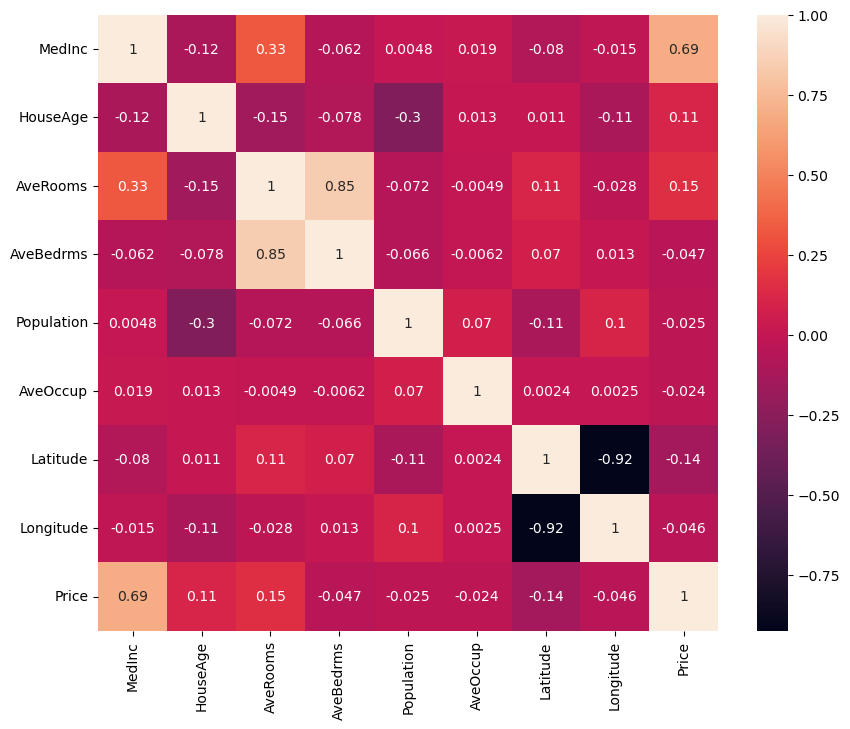

In [21]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

In [23]:
X = df.drop('Price',axis=1)
y = df['Price']

In [25]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [27]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: Price, Length: 20640, dtype: float64

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [31]:
df.shape

(20640, 9)

In [33]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
8158,4.2143,37.0,5.288235,0.973529,860.0,2.529412,33.81,-118.12
18368,5.3468,42.0,6.364322,1.087940,957.0,2.404523,37.16,-121.98
19197,3.9191,36.0,6.110063,1.059748,711.0,2.235849,38.45,-122.69
3746,6.3703,32.0,6.000000,0.990196,1159.0,2.272549,34.16,-118.41
13073,2.3684,17.0,4.795858,1.035503,706.0,2.088757,38.57,-121.33
...,...,...,...,...,...,...,...,...
11284,6.3700,35.0,6.129032,0.926267,658.0,3.032258,33.78,-117.96
11964,3.0500,33.0,6.868597,1.269488,1753.0,3.904232,34.02,-117.43
5390,2.9344,36.0,3.986717,1.079696,1756.0,3.332068,34.03,-118.38
860,5.7192,15.0,6.395349,1.067979,1777.0,3.178891,37.58,-121.96


In [35]:
X_test

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
20046,1.6812,25.0,4.192201,1.022284,1392.0,3.877437,36.06,-119.01
3024,2.5313,30.0,5.039384,1.193493,1565.0,2.679795,35.14,-119.46
15663,3.4801,52.0,3.977155,1.185877,1310.0,1.360332,37.80,-122.44
20484,5.7376,17.0,6.163636,1.020202,1705.0,3.444444,34.28,-118.72
9814,3.7250,34.0,5.492991,1.028037,1063.0,2.483645,36.62,-121.93
...,...,...,...,...,...,...,...,...
5363,6.6260,51.0,5.532213,0.974790,771.0,2.159664,34.04,-118.42
19755,2.1898,30.0,4.509091,0.945455,410.0,2.484848,40.18,-122.21
4885,2.1667,37.0,3.272152,1.056962,2173.0,4.584388,34.02,-118.26
13043,6.8869,6.0,7.382385,1.030075,2354.0,2.528464,38.51,-121.06


In [37]:
y_train.shape

(15480,)

In [39]:
y_test.shape

(5160,)

In [41]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [43]:
y_pred = model.predict(X_test)
y_pred

array([0.72412832, 1.76677807, 2.71151581, ..., 1.72382152, 2.34689276,
       3.52917352])

In [45]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print(mean_squared_error(y_pred,y_test))

0.541128747847068


In [47]:
print(mean_absolute_error(y_pred,y_test))

0.5296964012919445


In [49]:
r2_score(y_pred,y_test)

0.34413518487145167

In [51]:
df.iloc[1,:].values

array([ 8.30140000e+00,  2.10000000e+01,  6.23813708e+00,  9.71880492e-01,
        2.40100000e+03,  2.10984183e+00,  3.78600000e+01, -1.22220000e+02,
        3.58500000e+00])

In [53]:
model.predict([[ 8.30140000e+00,  2.10000000e+01,  6.23813708e+00,  9.71880492e-01,
        2.40100000e+03,  2.10984183e+00,  3.78600000e+01, -1.22220000e+02]])

array([3.99623821])

In [55]:
df.iloc[0,:].values

array([   8.3252    ,   41.        ,    6.98412698,    1.02380952,
        322.        ,    2.55555556,   37.88      , -122.23      ,
          4.526     ])

In [57]:
model.predict([[8.3252    ,   41.        ,    6.98412698,    1.02380952,
        322.        ,    2.55555556,   37.88      , -122.23 ]])

array([4.1438511])

# MSE

1. Mean Squared Error (MSE):
   MSE is a measure of the average squared difference between the predicted values and the actual values. It gives more weight to larger errors. The formula for MSE is:

   MSE = (1/n) * Σ(yi - ŷi)^2

   Where:
   - n is the number of data points.
   - yi represents the actual values.
   - ŷi represents the predicted values.

   Let's illustrate this with an example:

   Actual values (yi): [2, 3, 5, 7, 10]
   Predicted values (ŷi): [1.5, 2.5, 4.5, 7.5, 9.5]

   MSE = (1/5) * [(2 - 1.5)^2 + (3 - 2.5)^2 + (5 - 4.5)^2 + (7 - 7.5)^2 + (10 - 9.5)^2]
   MSE = (1/5) * [0.25 + 0.25 + 0.25 + 0.25 + 0.25]
   MSE = 0.25

In [59]:
import numpy as np
y_actual = np.array([2, 3, 5, 7, 10])
y_pred = np.array([1.5, 2.5, 4.5, 7.5, 9.5])

In [61]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print(mean_squared_error(y_actual,y_pred))

0.25


2. Mean Absolute Error (MAE):
   MAE is a measure of the average absolute difference between the predicted values and the actual values. It gives equal weight to all errors. The formula for MAE is:

   MAE = (1/n) * Σ|yi - ŷi|

   Using the same example:

   MAE = (1/5) * [|2 - 1.5| + |3 - 2.5| + |5 - 4.5| + |7 - 7.5| + |10 - 9.5|]
   MAE = (1/5) * [0.5 + 0.5 + 0.5 + 0.5 + 0.5]
   MAE = 0.5

In [63]:
print(mean_absolute_error(y_actual,y_pred))

0.5


## 💡 Key Insights

- `OverallQual` has a strong positive correlation with `SalePrice`
- Features like `GrLivArea`, `TotalBsmtSF`, and `GarageCars` also show significant relationships with house price
- Some features had many missing values (like `PoolQC`, `MiscFeature`) and were removed due to lack of relevance

These insights can be used to build a predictive model in future steps.

3. R-squared (R^2) Score:
   R-squared is a measure of how well the regression model fits the data. It represents the proportion of the variance in the dependent variable (y) that is explained by the independent variables (X). The formula for R^2 is:

   R^2 = 1 - (MSE(model) / MSE(mean))

   Where:
   - MSE(model) is the mean squared error of the model.
   - MSE(mean) is the mean squared error of the mean of the actual values.

   In this example, we already calculated MSE as 0.25. Let's assume the mean of the actual values is 5:

   MSE(mean) = (1/5) * [(2 - 5)^2 + (3 - 5)^2 + (5 - 5)^2 + (7 - 5)^2 + (10 - 5)^2]
   MSE(mean) = (1/5) * [9 + 4 + 0 + 4 + 25]
   MSE(mean) = 8.4

   Now, calculate R^2:

   R^2 = 1 - (0.25 / 8.4)
   R^2 ≈ 0.9702<br><br>
An R^2 score close to 1 indicates that the model explains a high proportion of the variance in the data, while lower values suggest that the model does not fit the data well. In this example, the R^2 score of approximately 0.9702 indicates a good fit between the model and the data.

## ✅ Conclusion

This exploratory data analysis helped us identify important trends and features that affect house prices. The dataset is now cleaner and better understood, making it suitable for modeling or dashboarding in further stages.

Future work could include:
- Building a regression model for price prediction
- Feature selection and hyperparameter tuning
- Deploying a price prediction tool using this analysis